In [3]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data

In [4]:
df = pd.read_csv('../raw_data/nlp/data',sep=',',header=None)
df.columns = ['text']
df.head()

,text
0,From: gld@cunixb.cc.columbia.edu (Gary L Dare)...
1,From: atterlep@vela.acs.oakland.edu (Cardinal ...
2,From: miner@kuhub.cc.ukans.edu\nSubject: Re: A...
3,From: atterlep@vela.acs.oakland.edu (Cardinal ...
4,From: vzhivov@superior.carleton.ca (Vladimir Z...


# text pre-cleaning

In [5]:
# basic cleaning

def basic_cleaning(sentence):
    
    # remove punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')
    
    # strip sentences
    sentence = sentence.strip()
    
    # lowercase
    sentence = sentence.lower()
    
    # remove digits
    sentence = ''.join(char for char in sentence if not char.isdigit())
    
    # tokenize
    sentence = word_tokenize(sentence)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    without_stop = [word for word in sentence if not word in stop_words]
    
    return ' '.join(without_stop)

In [7]:
df['clean_text'] = df['text'].apply(basic_cleaning)
df.head()

,text,clean_text
0,From: gld@cunixb.cc.columbia.edu (Gary L Dare)...,gldcunixbcccolumbiaedu gary l dare subject sta...
1,From: atterlep@vela.acs.oakland.edu (Cardinal ...,atterlepvelaacsoaklandedu cardinal ximenez sub...
2,From: miner@kuhub.cc.ukans.edu\nSubject: Re: A...,minerkuhubccukansedu subject ancient books org...
3,From: atterlep@vela.acs.oakland.edu (Cardinal ...,atterlepvelaacsoaklandedu cardinal ximenez sub...
4,From: vzhivov@superior.carleton.ca (Vladimir Z...,vzhivovsuperiorcarletonca vladimir zhivov subj...


# text preprocessing

In [8]:
# lemmatize
lemmatizer = WordNetLemmatizer()

def lemmatizer_text(line):
    lemmatize_line = ''.join(lemmatizer.lemmatize(w) for w in line)
    return lemmatize_line

df['clean_text'] = df['clean_text'].apply(lemmatizer_text)


# Latent Dirichlet Allocation model

In [24]:
# vectorize

vectorizer = TfidfVectorizer(min_df = 0.1,stop_words={'english'})
text_vectorized = vectorizer.fit_transform(df['clean_text'])

# LDA model

lda = LatentDirichletAllocation(n_components=2).fit(text_vectorized)


In [20]:
# potential topics

def print_topics(model,vector):
    
    for index,topic in enumerate(model.components_):
        
        d = {vector.get_feature_names()[i]:topic[i] for i in topic.argsort()[:-10 - 1:-1]}
        
        print(d)
        
        df = pd.DataFrame.from_dict(d,orient='index')
        plt.plot(df)
        plt.show()
    

{'god': 88.38333170781733, 'people': 60.87723772918896, 'would': 58.52301528203296, 'one': 53.53582637242817, 'jesus': 52.02984841146617, 'church': 47.04729346569336, 'christians': 42.709302203225974, 'know': 42.672497637782655, 'us': 42.22123192015579, 'believe': 41.42963084473139}


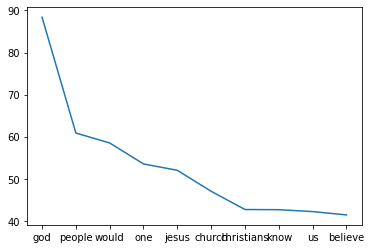

{'team': 68.40206745481653, 'game': 65.49820368585424, 'hockey': 62.24787212147247, 'university': 60.66684991527848, 'organization': 57.76854060660712, 'subject': 56.03801057946776, 'lines': 55.138816985338266, 'go': 54.843906594630994, 'nntppostinghost': 47.1086579362574, 'play': 44.764352879023924}


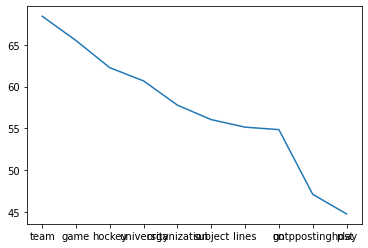

In [25]:
# visualize topics
print_topics(lda,vectorizer)

# model prediction

In [26]:
# give a new test example
example = ['time to play hockey in our university at 2 pm what you think']

# vectorize
ex_v = vectorizer.transform(example)

# model transform
ex_lda = lda.transform(ex_v)

# prediction
ex_lda

array([[0.18330099, 0.81669901]])